# Train and Evaluating Classifiers

We will go try different classifiers and tune them


### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
%load_ext autoreload
%autoreload 2

from utils import random_search_cv, plot_search_results

## Data Loading 

In [4]:
from preprocessing import DataPreprocessor

# Initialize the preprocessor
preprocessor = DataPreprocessor()

# Get preprocessed training and validation data
X_train, X_val, y_train, y_val = preprocessor.preprocess_data('data/train.csv')

# When you need to preprocess test data
X_test, passenger_ids = preprocessor.preprocess_test_data('data/test.csv')

/Users/julienh/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/julienh/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Training Classifiers

We want to select the best model for each ML model for ensemble later

### Random Forest Classifiers

A powerful tree ensemble that takes bootstraps (sample with replacement) of the data and train a decision tree on each bootstrap

In [21]:
# Random Forest parameters
rf_param_grid = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(10, 50, 5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# perform random search on the param grid
rf_results = random_search_cv(
    RandomForestClassifier(),
    X_train,
    y_train,
    rf_param_grid
)
 

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters found:
{'max_depth': 45, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 198}

Best cross-validation accuracy: 0.8017


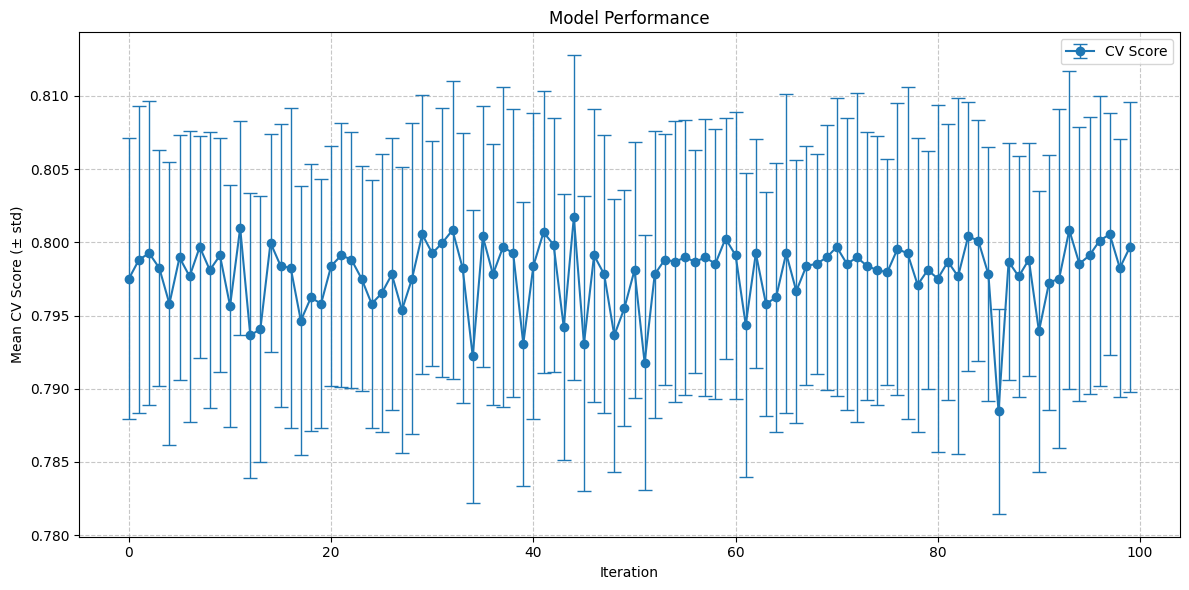

In [34]:
plot_search_results(rf_results['cv_results'])


In [40]:
# saving the best model
best_rf_model = rf_results['best_model']

best_rf_model

RandomForestClassifier(max_depth=45, min_samples_leaf=2, min_samples_split=11,
                       n_estimators=198)

### Gradient Boosting Classifiers

A popular ensemble technique that builds trees one at a time, each tree corrects the errors of the previous one

In [41]:

# Gradient Boosting parameters
gb_param_grid = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4)
}

gb_results = random_search_cv(
    GradientBoostingClassifier(),
    X_train,
    y_train,
    gb_param_grid
)


Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters found:
{'learning_rate': 0.031282275099978295, 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 16, 'n_estimators': 191, 'subsample': 0.8315459582030235}

Best cross-validation accuracy: 0.8077


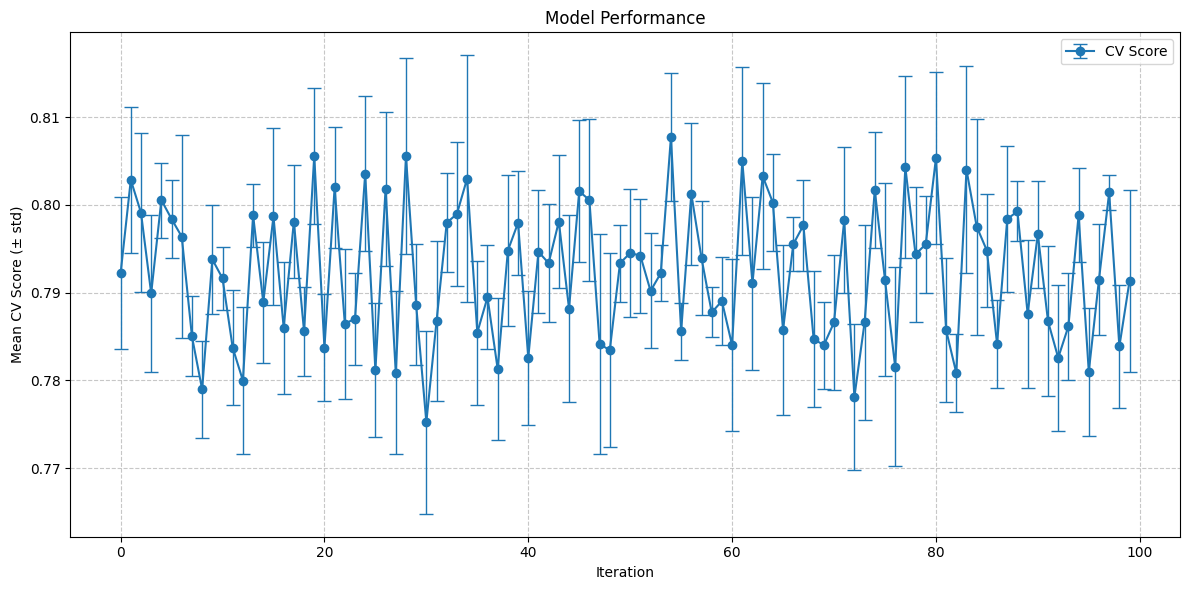

In [42]:
plot_search_results(gb_results['cv_results'])


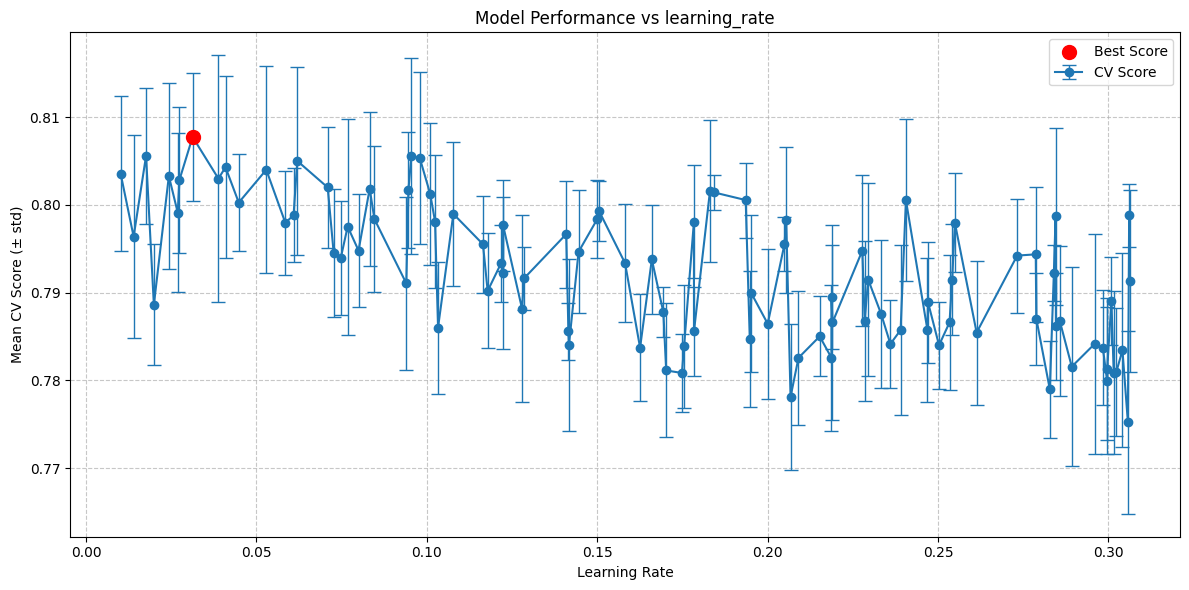

In [45]:
plot_search_results(gb_results['cv_results'], 'learning_rate')

In [43]:
# saving the best model
best_gb_model = gb_results['best_model']

best_gb_model

GradientBoostingClassifier(learning_rate=0.031282275099978295, max_depth=8,
                           min_samples_leaf=3, min_samples_split=16,
                           n_estimators=191, subsample=0.8315459582030235)

### Multi-layer Perceptron classifier

A multi-layer perceptron is a feedforward artificial neural network model that is trained using backpropagation. It is a non-linear model that can be used for classification and regression tasks.

In [46]:

# Neural Network parameters
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': uniform(0.0001, 0.01),
    'learning_rate_init': uniform(0.001, 0.01),
    'max_iter': [750, 1000, 1250]
}

mlp_results = random_search_cv(
    MLPClassifier(),
    X_train,
    y_train,
    mlp_param_grid
)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/julienh/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/julienh/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/julienh/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/julienh/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converge


Best parameters found:
{'activation': 'relu', 'alpha': 0.008121969807540395, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0011563640674119393, 'max_iter': 300}

Best cross-validation accuracy: 0.7931


/Users/julienh/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


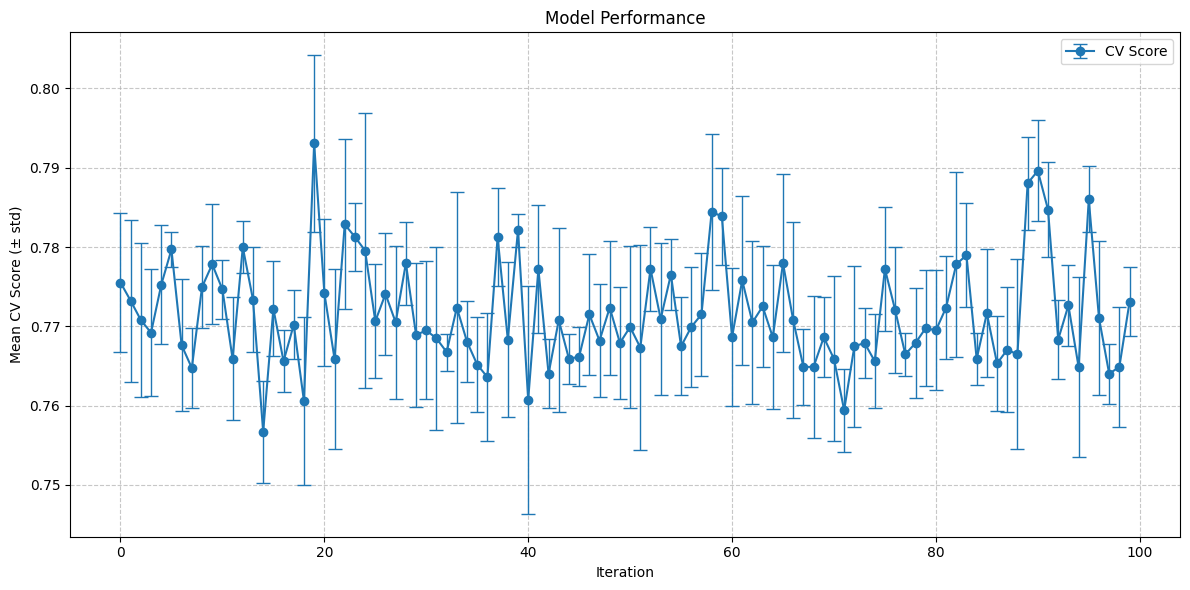

In [47]:
plot_search_results(mlp_results['cv_results'])

In [48]:
best_mlp_model = mlp_results['best_model']

best_mlp_model


MLPClassifier(alpha=0.008121969807540395, hidden_layer_sizes=(50,),
              learning_rate_init=0.0011563640674119393, max_iter=300)

### Support Vector Classifiers

A supervised learning algorithm that finds the optimal hyperplane to separate data points from different classes by maximizing the margin between them. It works well for both linear and non-linear classification tasks, with non-linear capabilities achieved using kernel functions like RBF or polynomial kernels.

In [6]:
# Create a Support Vector Machine classifier
svc_model = SVC(kernel='rbf', random_state=42)

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions
y_pred = svc_model.predict(X_val)

# Calculate accuracy
accuracy = np.mean(y_pred == y_val)
print("Accuracy:", accuracy)

Accuracy: 0.7883841288096607


In [15]:
xgb_model = XGBClassifier(enable_categorical=True)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
accuracy = np.mean(y_pred == y_val)
print("Accuracy:", accuracy)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:CryoSleep: object, Age: object, VIP: object, RoomService: object, FoodCourt: object, ShoppingMall: object, Spa: object, VRDeck: object, Age_Missing: object, RoomService_Missing: object, FoodCourt_Missing: object, ShoppingMall_Missing: object, Spa_Missing: object, VRDeck_Missing: object, HomePlanet_Missing: object, Destination_Missing: object, Cabin_Number_Group: object, Cabin_Side_P: object, GroupSize: object, IsSolo: object, TotalSpending: object, HasAnySpending: object, RoomService_Log: object, FoodCourt_Log: object, ShoppingMall_Log: object, Spa_Log: object, VRDeck_Log: object, TotalSpending_Log: object, Age_Child: object, Age_Teen: object, Age_Young Adult: object, Age_Adult: object, Age_Middle Aged: object, Age_Senior: object, HP_Earth: object, HP_Europa: object, HP_Mars: object, Dest_55 Cancri e: object, Dest_PSO J318.5-22: object, Dest_TRAPPIST-1e: object, Deck_A: object, Deck_B: object, Deck_C: object, Deck_D: object, Deck_E: object, Deck_F: object, Deck_G: object, Deck_T: object, Deck_Unknown: object

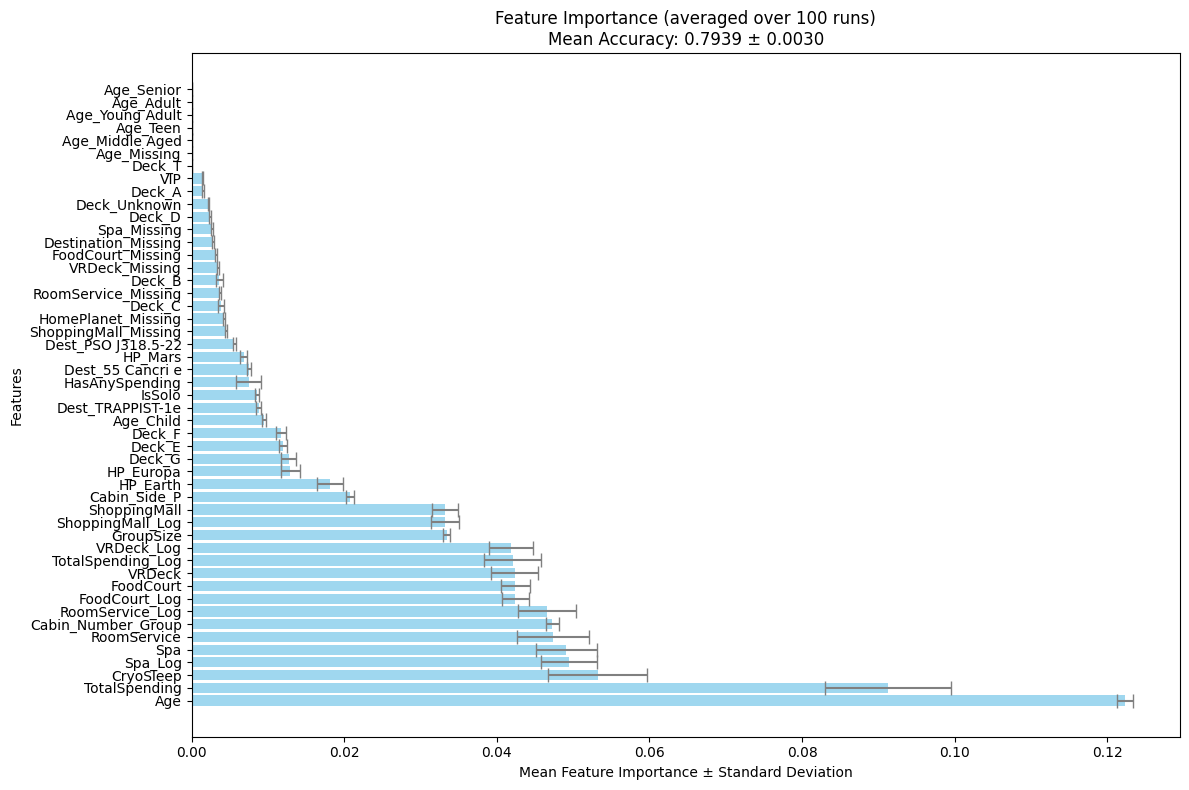


Feature Importance Summary:
Age: 0.1223 ± 0.0010
TotalSpending: 0.0912 ± 0.0082
CryoSleep: 0.0532 ± 0.0064
Spa_Log: 0.0495 ± 0.0036
Spa: 0.0491 ± 0.0040
RoomService: 0.0473 ± 0.0047
Cabin_Number_Group: 0.0473 ± 0.0008
RoomService_Log: 0.0466 ± 0.0038
FoodCourt_Log: 0.0424 ± 0.0018
FoodCourt: 0.0424 ± 0.0019
VRDeck: 0.0424 ± 0.0031
TotalSpending_Log: 0.0421 ± 0.0037
VRDeck_Log: 0.0419 ± 0.0029
GroupSize: 0.0334 ± 0.0005
ShoppingMall_Log: 0.0333 ± 0.0018
ShoppingMall: 0.0332 ± 0.0017
Cabin_Side_P: 0.0208 ± 0.0005
HP_Earth: 0.0182 ± 0.0017
HP_Europa: 0.0130 ± 0.0013
Deck_G: 0.0127 ± 0.0010
Deck_E: 0.0120 ± 0.0005
Deck_F: 0.0117 ± 0.0007
Age_Child: 0.0095 ± 0.0002
Dest_TRAPPIST-1e: 0.0088 ± 0.0003
IsSolo: 0.0086 ± 0.0003
HasAnySpending: 0.0075 ± 0.0016
Dest_55 Cancri e: 0.0075 ± 0.0002
HP_Mars: 0.0068 ± 0.0004
Dest_PSO J318.5-22: 0.0056 ± 0.0002
ShoppingMall_Missing: 0.0045 ± 0.0001
HomePlanet_Missing: 0.0043 ± 0.0001
Deck_C: 0.0039 ± 0.0004
RoomService_Missing: 0.0038 ± 0.0001
Deck_B: 0.

In [9]:


# Perform multiple trainings with different random seeds
n_iterations = 100
importance_scores = []
accuracies = []

for i in range(n_iterations):
    # Create and train Random Forest with different random state
    rf_model = RandomForestClassifier(random_state=i + 42)
    rf_model.fit(X_train, y_train)
    
    # Store feature importances
    importance_scores.append(rf_model.feature_importances_)
    
    # Calculate and store accuracy
    y_pred = rf_model.predict(X_val)
    accuracy = np.mean(y_pred == y_val)
    accuracies.append(accuracy)
    #print(f"Iteration {i+1} Accuracy: {accuracy:.4f}")

# Convert to numpy array for easier manipulation
importance_scores = np.array(importance_scores)

# Calculate mean and std of importances
mean_importances = np.mean(importance_scores, axis=0)
std_importances = np.std(importance_scores, axis=0)

# Sort features by mean importance
indices = np.argsort(mean_importances)[::-1]
sorted_features = X_train.columns[indices]

# Plot
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(sorted_features))

plt.barh(y_pos, mean_importances[indices], xerr=std_importances[indices],
         align='center', alpha=0.8, capsize=5, color='skyblue', ecolor='gray')

plt.yticks(y_pos, sorted_features)
plt.xlabel('Mean Feature Importance ± Standard Deviation')
plt.ylabel('Features')
plt.title(f'Feature Importance (averaged over {n_iterations} runs)\nMean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}')
plt.tight_layout()
plt.show()

# Print numerical results
print("\nFeature Importance Summary:")
for idx in indices:
    print(f"{X_train.columns[idx]}: {mean_importances[idx]:.4f} ± {std_importances[idx]:.4f}")


Best accuracy: 0.8033
Number of features: 35

Best feature combination:
- Age
- Age_Middle Aged
- Age_Senior
- Age_Teen
- Cabin_Number_Group
- Cabin_Side_P
- CryoSleep
- Deck_A
- Deck_B
- Deck_C
- Deck_D
- Deck_E
- Deck_F
- Deck_G
- Deck_T
- Dest_55 Cancri e
- Dest_PSO J318.5-22
- Destination_Missing
- FoodCourt
- FoodCourt_Log
- FoodCourt_Missing
- HP_Europa
- HP_Mars
- HasAnySpending
- HomePlanet_Missing
- RoomService_Log
- ShoppingMall
- ShoppingMall_Log
- ShoppingMall_Missing
- Spa
- Spa_Log
- TotalSpending_Log
- VIP
- VRDeck_Log
- VRDeck_Missing


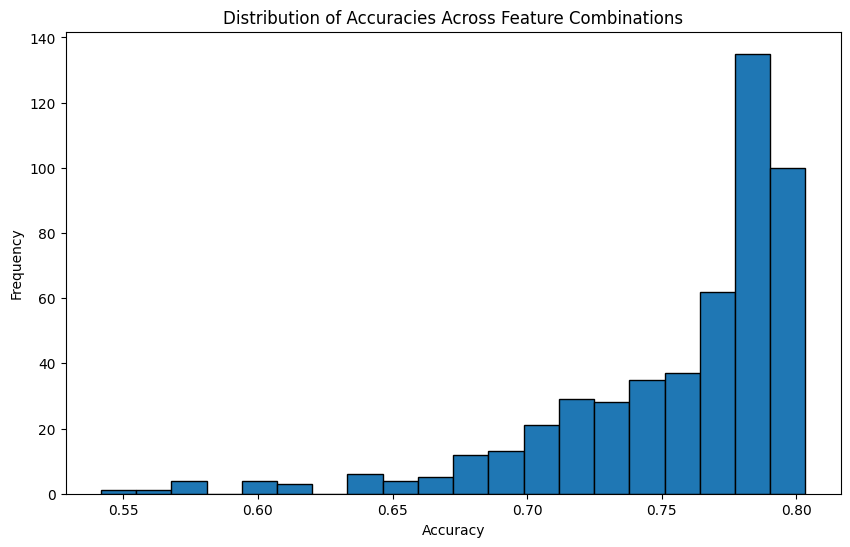

In [14]:
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.metrics import accuracy_score

# Parameters
n_iterations = 500  # Number of different feature combinations to try
min_features = 5   # Minimum number of features to select
max_features = len(X_train.columns) - 10  # Maximum number of features to select

# Store results
feature_combinations = []
accuracies = []

# Get all feature names
all_features = list(X_train.columns)

for i in range(n_iterations):
    # Randomly select number of features to use
    n_features = random.randint(min_features, max_features)
    
    # Randomly select features
    selected_features = random.sample(all_features, n_features)
    
    # Train model with selected features
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train[selected_features], y_train)
    
    # Evaluate
    y_pred = rf_model.predict(X_val[selected_features])
    acc = accuracy_score(y_val, y_pred)
    
    # Store results
    feature_combinations.append(selected_features)
    accuracies.append(acc)
    
# Find best combination
best_idx = np.argmax(accuracies)
print(f"\nBest accuracy: {accuracies[best_idx]:.4f}")
print(f"Number of features: {len(feature_combinations[best_idx])}")
print("\nBest feature combination:")
for feature in sorted(feature_combinations[best_idx]):
    print(f"- {feature}")

# Plot accuracy distribution
plt.figure(figsize=(10, 6))
plt.hist(accuracies, bins=20, edgecolor='black')
plt.title('Distribution of Accuracies Across Feature Combinations')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

## Training Ensemble Model

We will use a stacking classifier


In [5]:
best_rf_model = RandomForestClassifier(max_depth=45, min_samples_leaf=2, min_samples_split=11,
                       n_estimators=198)

best_gb_model = GradientBoostingClassifier(learning_rate=0.031282275099978295, max_depth=8,
                           min_samples_leaf=3, min_samples_split=16,
                           n_estimators=191, subsample=0.8315459582030235)

best_mlp_model = MLPClassifier(alpha=0.008121969807540395, hidden_layer_sizes=(50,),
              learning_rate_init=0.0011563640674119393, max_iter=300)


In [13]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

class StackingClassifierModel:
    def __init__(self, base_estimators, final_estimator):
        self.base_estimators = base_estimators
        self.final_estimator = final_estimator

    def fit(self, X, y):
        self.stacking_clf = StackingClassifier(estimators=self.base_estimators, final_estimator=self.final_estimator)
        self.stacking_clf.fit(X, y)

    def predict(self, X):
        return self.stacking_clf.predict(X)



# Create a Stacking classifier
stacking_model = StackingClassifierModel(base_estimators=[('rf', best_rf_model), ('gb', best_gb_model)], 
                                        final_estimator=LogisticRegression())

# Train the model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_val)

# Calculate accuracy
accuracy = np.mean(y_pred == y_val)
print("Accuracy:", accuracy)


Accuracy: 0.8096607245543416


## Predicting on the test.csv data and then submitting the results to Kaggle

In [14]:
# create submission predictions and write tofile

submission_predictions = stacking_model.predict(X_test)

submission_predictions = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': submission_predictions
})

submission_predictions['Transported'] = submission_predictions['Transported'].astype(bool)

submission_name = "stacking_ensemble"
submission_predictions.to_csv(f'submissions/{submission_name}_submission.csv', index=False)
